## S&P Global - AUTOMATIC BASELINE CORRECTION
### Misael M. Morales, Carlos Torres-Verdin, and Michael Pyrcz
#### 2024, The University of Texas at Austin
***

In [2]:
from auto_baseline_correction import *

***
# LOG ANALYSIS
***

In [3]:
spl = SPLogAnalysis()

------------------------------  Log Analysis Tool  ------------------------------


In [4]:
# ### WARNING: this takes a long time to run, only do it if you need to
# headers = spl.read_all_headers()

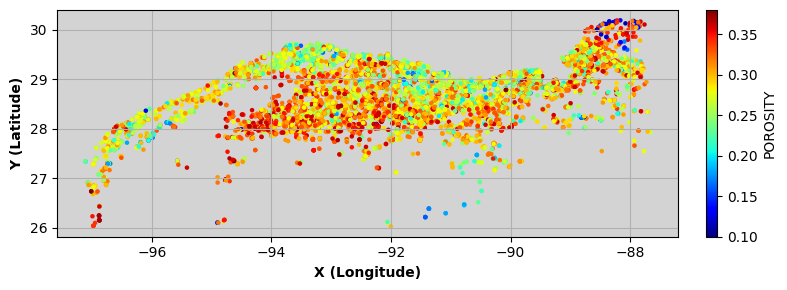

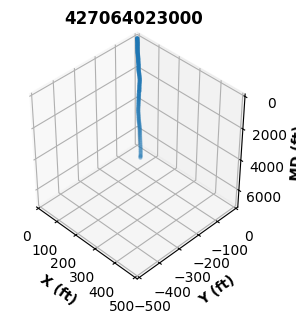

In [5]:
spl.plot_ccs_sand_wells(figsize=(8,3))
spl.plot_survey(figsize=(10,3))

dict_keys(['DEPT', 'ASN', 'CALI', 'DRHO', 'DT', 'GR', 'GR_NORM', 'ILD', 'RHOB', 'SP', 'SP_NORM', 'VSH_GR', 'VSH_SP'])


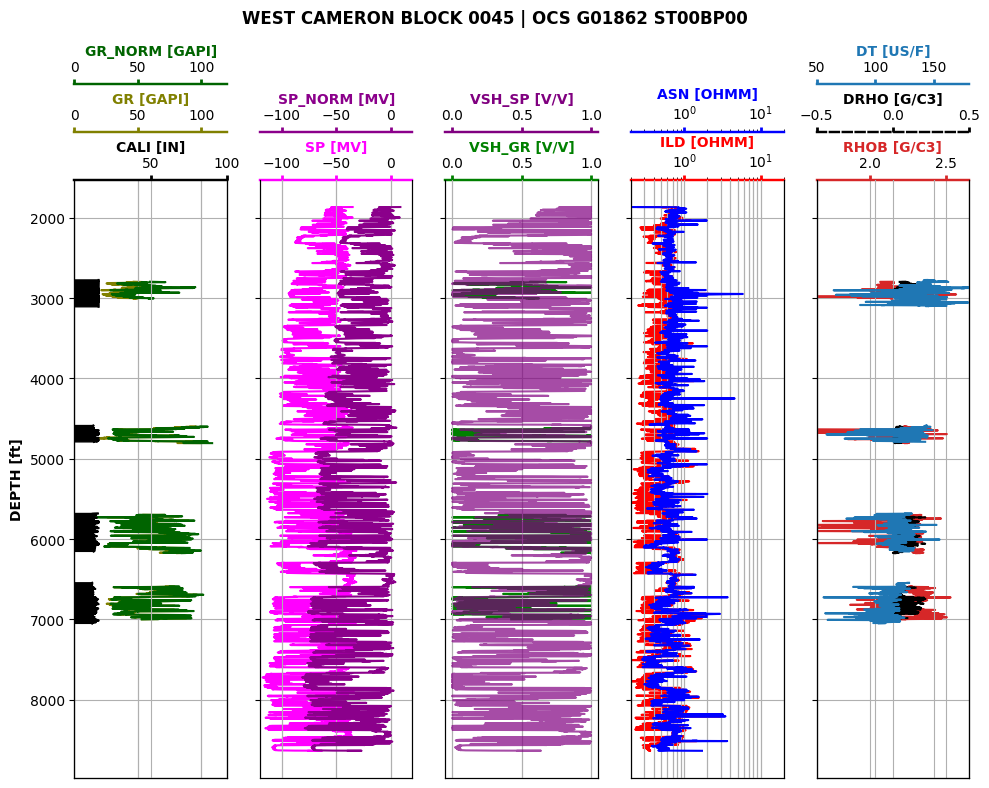

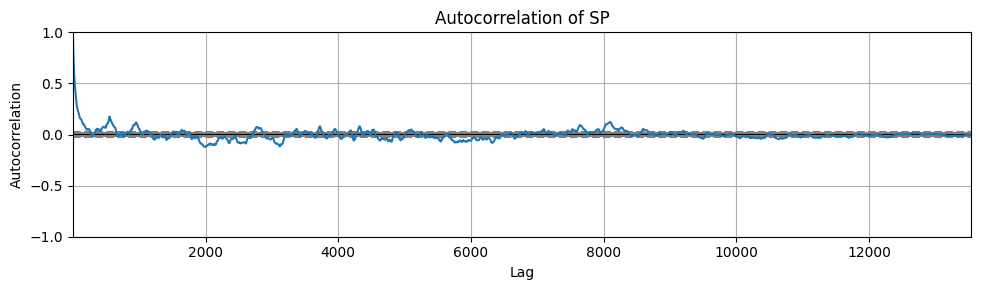

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                13543
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -28290.555
Date:                Wed, 21 Feb 2024   AIC                          56593.109
Time:                        11:40:25   BIC                          56638.190
Sample:                             0   HQIC                         56608.142
                              - 13543                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1084      0.004    314.001      0.000       1.101       1.115
ar.L2         -0.5243      0.006    -84.417      0.000      -0.536      -0.512
ar.L3          0.1098      0.008     14.372      0.0

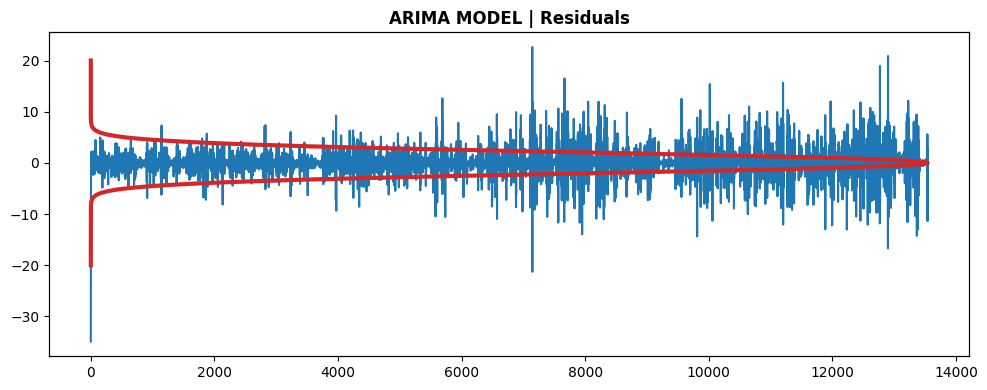

In [6]:
spl.plot_well('17700004060000')

***
# SP BASELINE CORRECTION
***

In [8]:
blc = BaselineCorrection()


 ------------------------------  Baseline Correction Tool  ------------------------------
Tensorflow built with CUDA? True
# GPU available: 1
CUDA: 12.2 | cuDNN: 8
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU') 
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
------------------------------------------------------------


(389, 44055, 3)
Well logs with Depth Derivative: (389, 44055, 4)
Well logs with Autocorrelation: (389, 44055, 5)
Well logs with Detrend Filter: (389, 44055, 6)
Well logs with Fourier Transform: (389, 44055, 7)
Well logs with Hilbert Transform: (389, 44055, 8)
Well logs with Symmetric IIR Filter: (389, 44055, 9)
Well logs with Savitzky-Golay Filter: (389, 44055, 10)
Well logs with Cubic Spline: (389, 44055, 11)


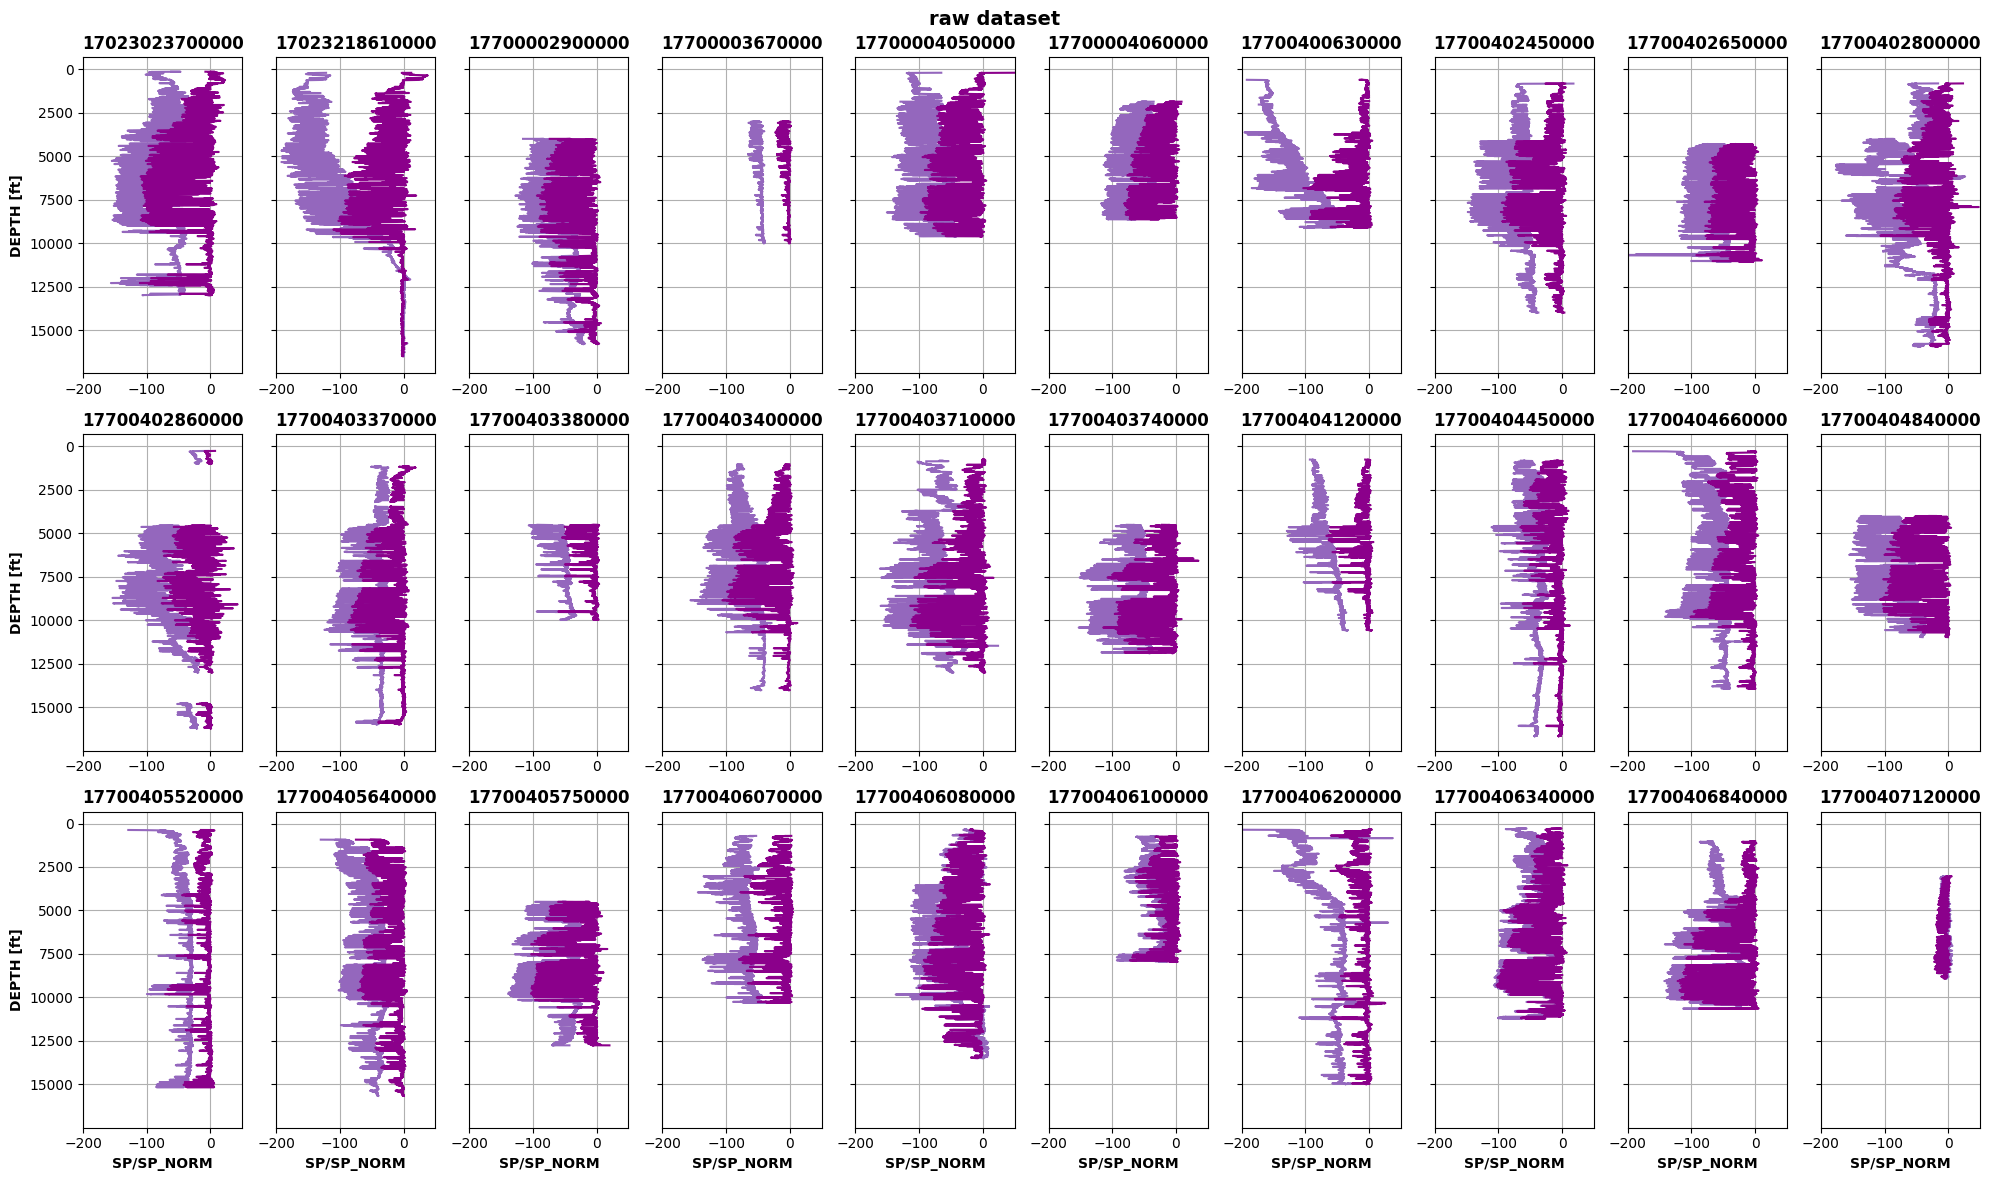

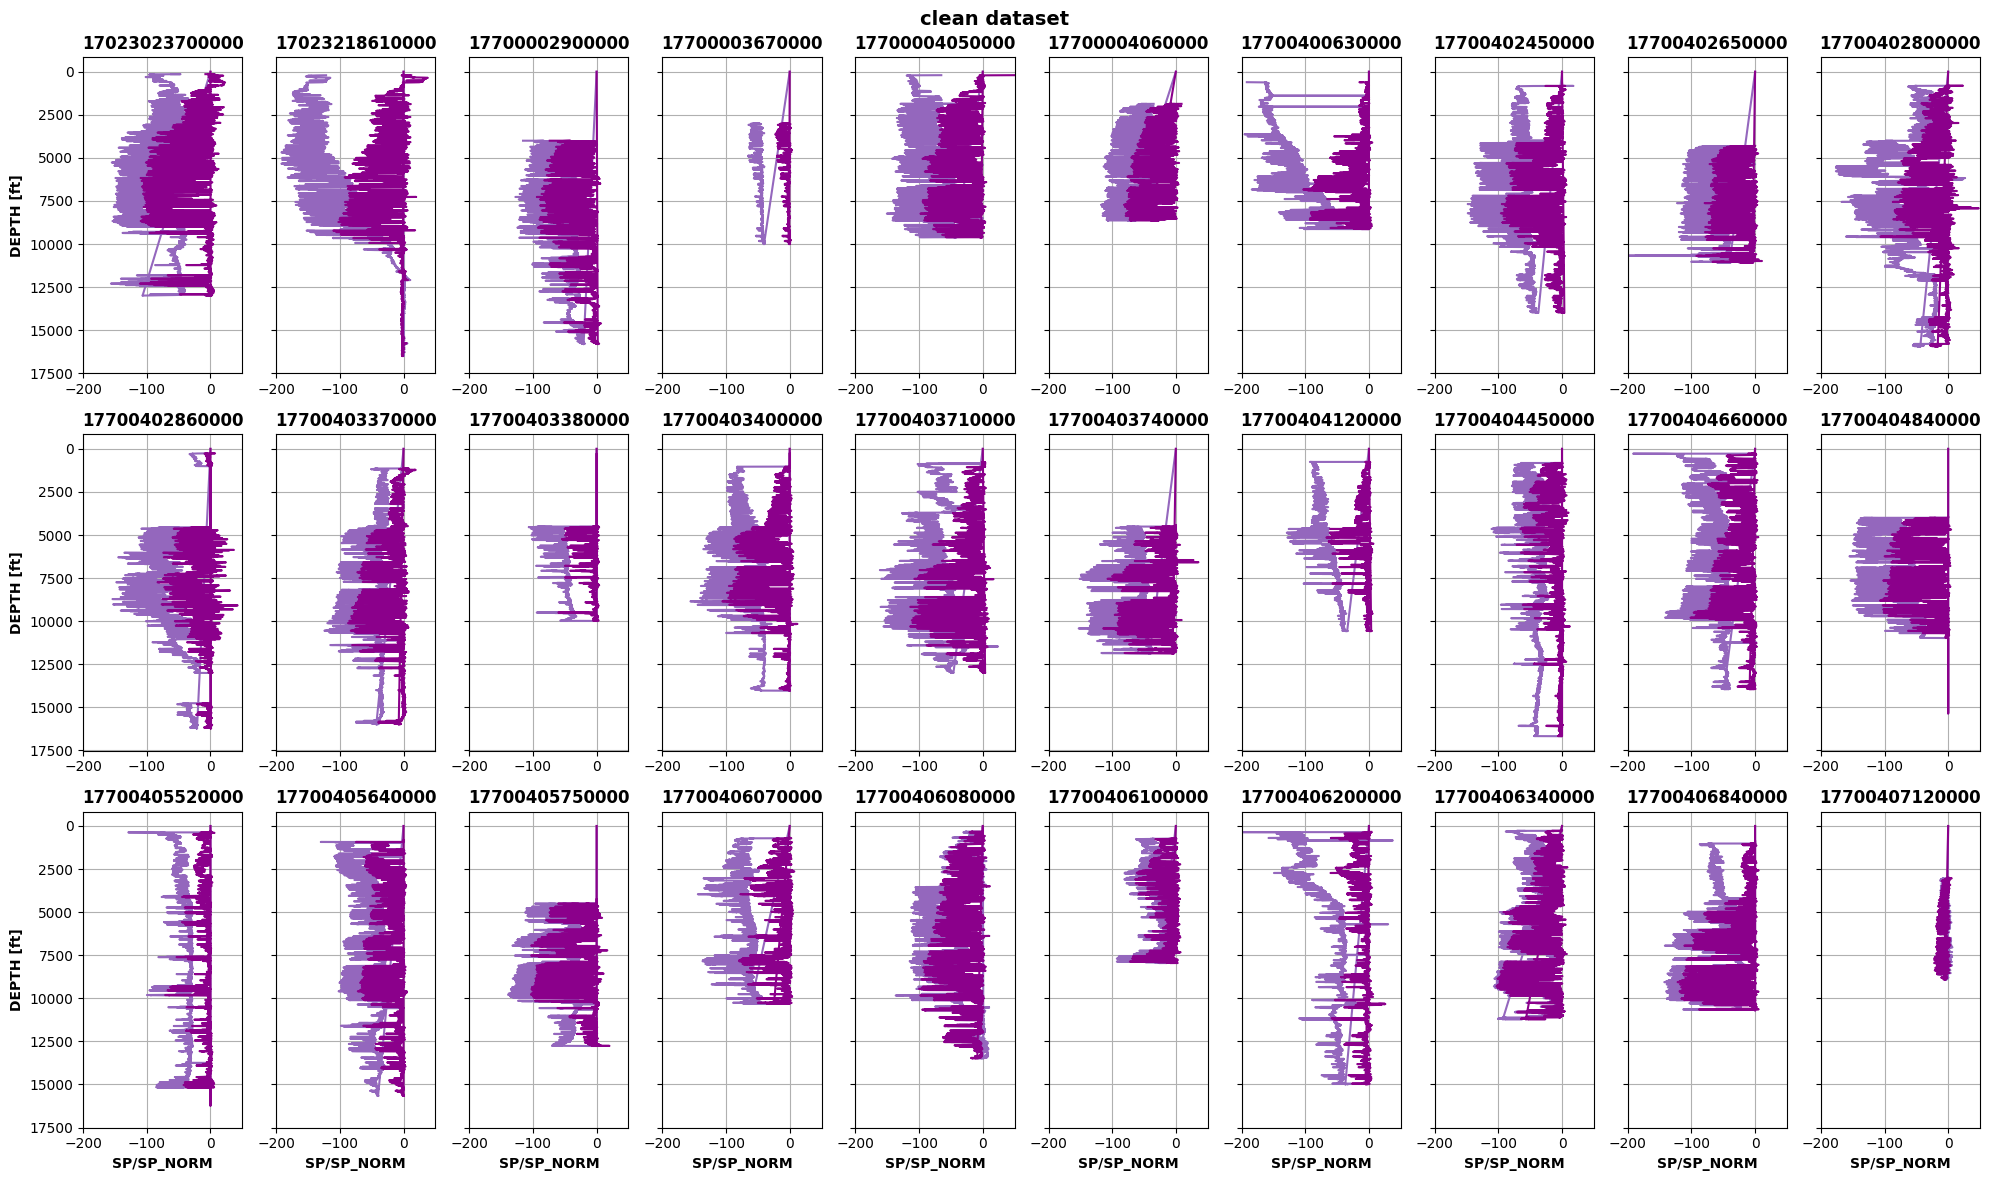

------------------------------------------------------------


In [9]:
blc.load_logs(preload=True)

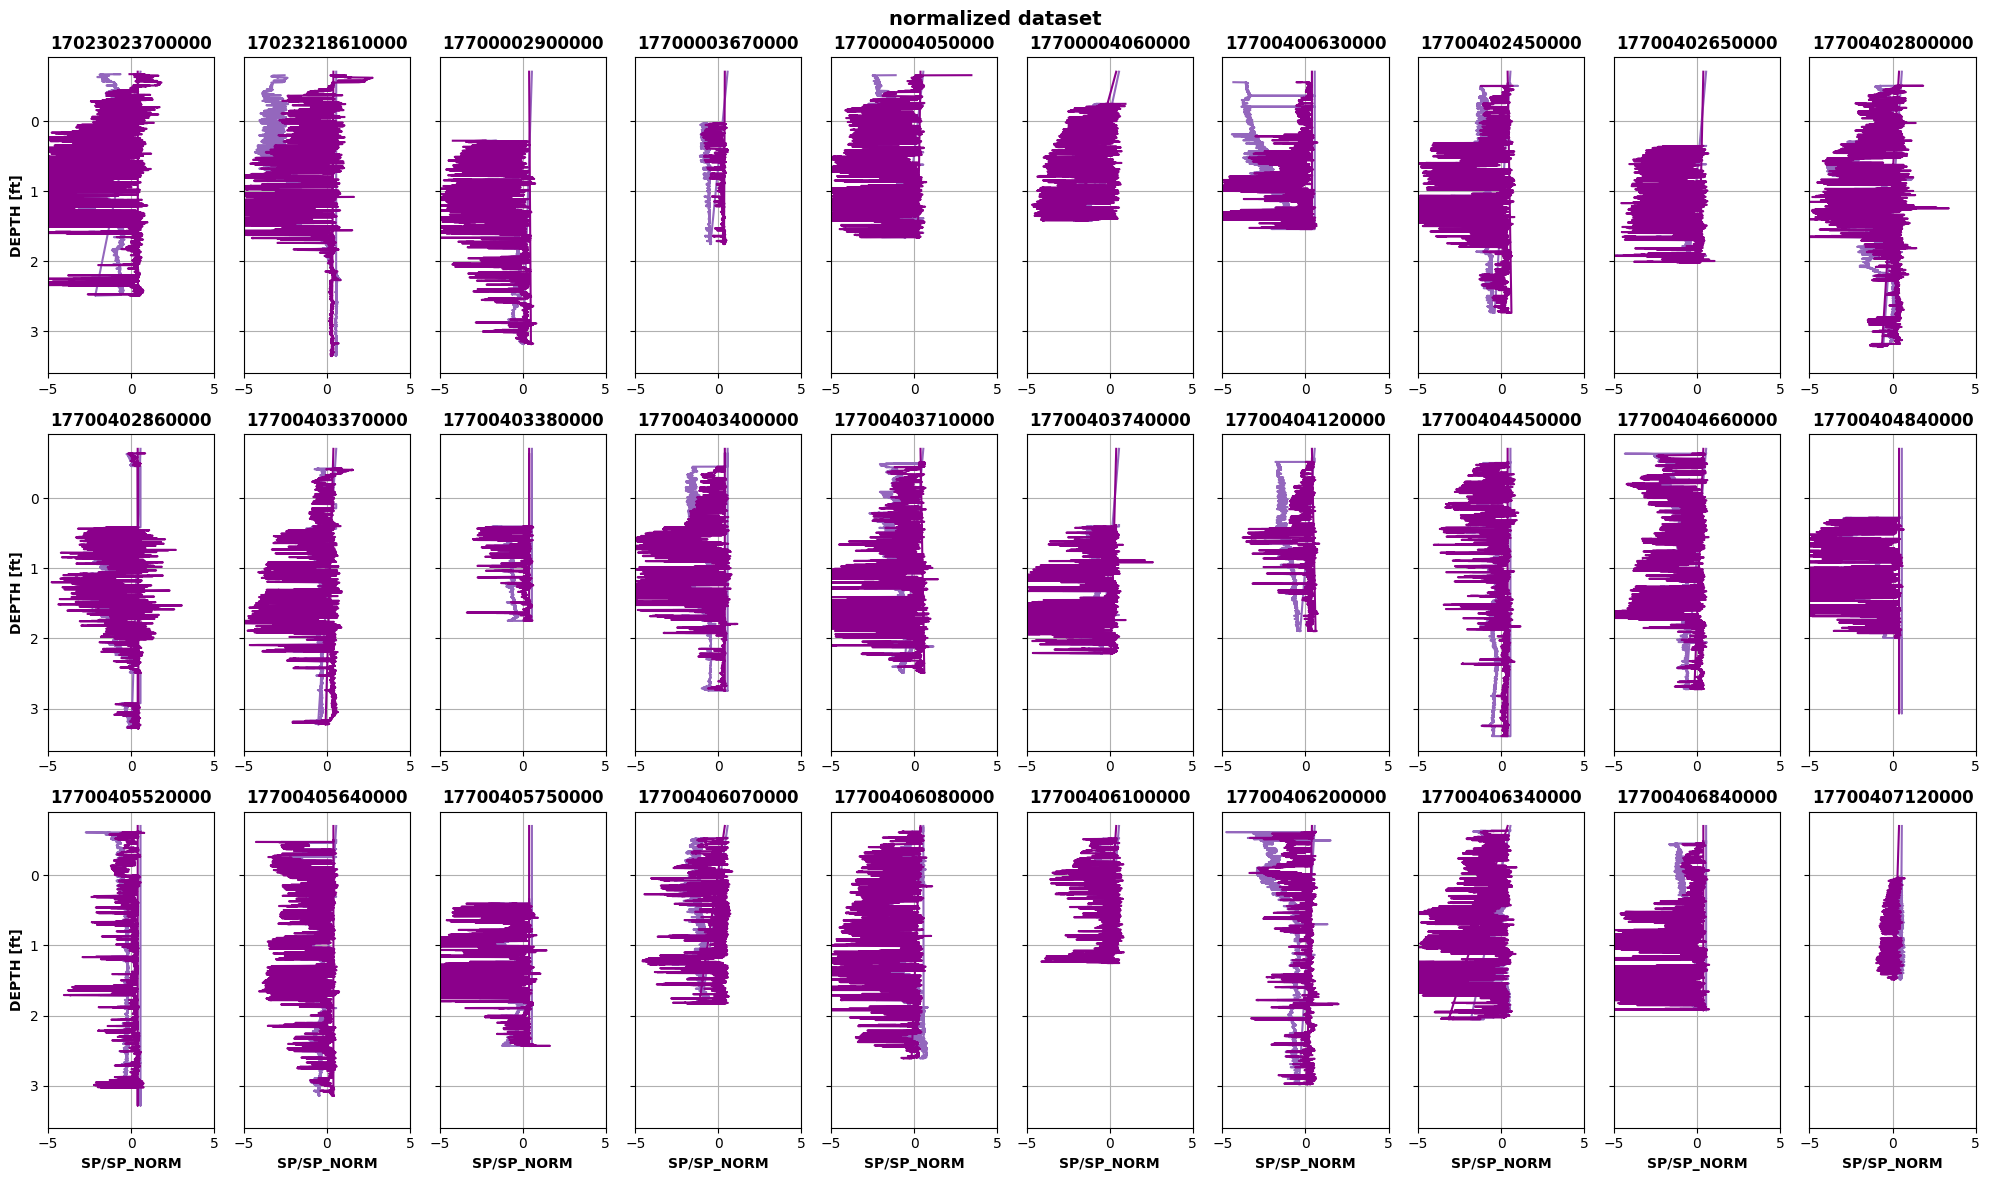

X_train: (300, 44055, 10) | X_test: (89, 44055, 10)
y_train: (300, 44055, 1) | y_test: (89, 44055, 1)
------------------------------------------------------------


In [10]:
blc.scale_and_random_split(scaler='standard')

In [12]:
blc.make_model(pretrained='baseline_correction_model.keras')

-------------------------------------------------- 
 # Parameters: 89,681
------------------------------------------------------------


3/3 [==============================] - 0s 32ms/step
--------------------------------------------------
X_train: (300, 44055, 10)  | y_train: (300, 44055, 1)
X_test:  (89, 44055, 10)   | y_test:  (89, 44055, 1)
y_train_pred: (300, 44055) | y_test_pred: (89, 44055)
--------------------------------------------------
Train MSE: 0.1266 | Test MSE: 0.0941


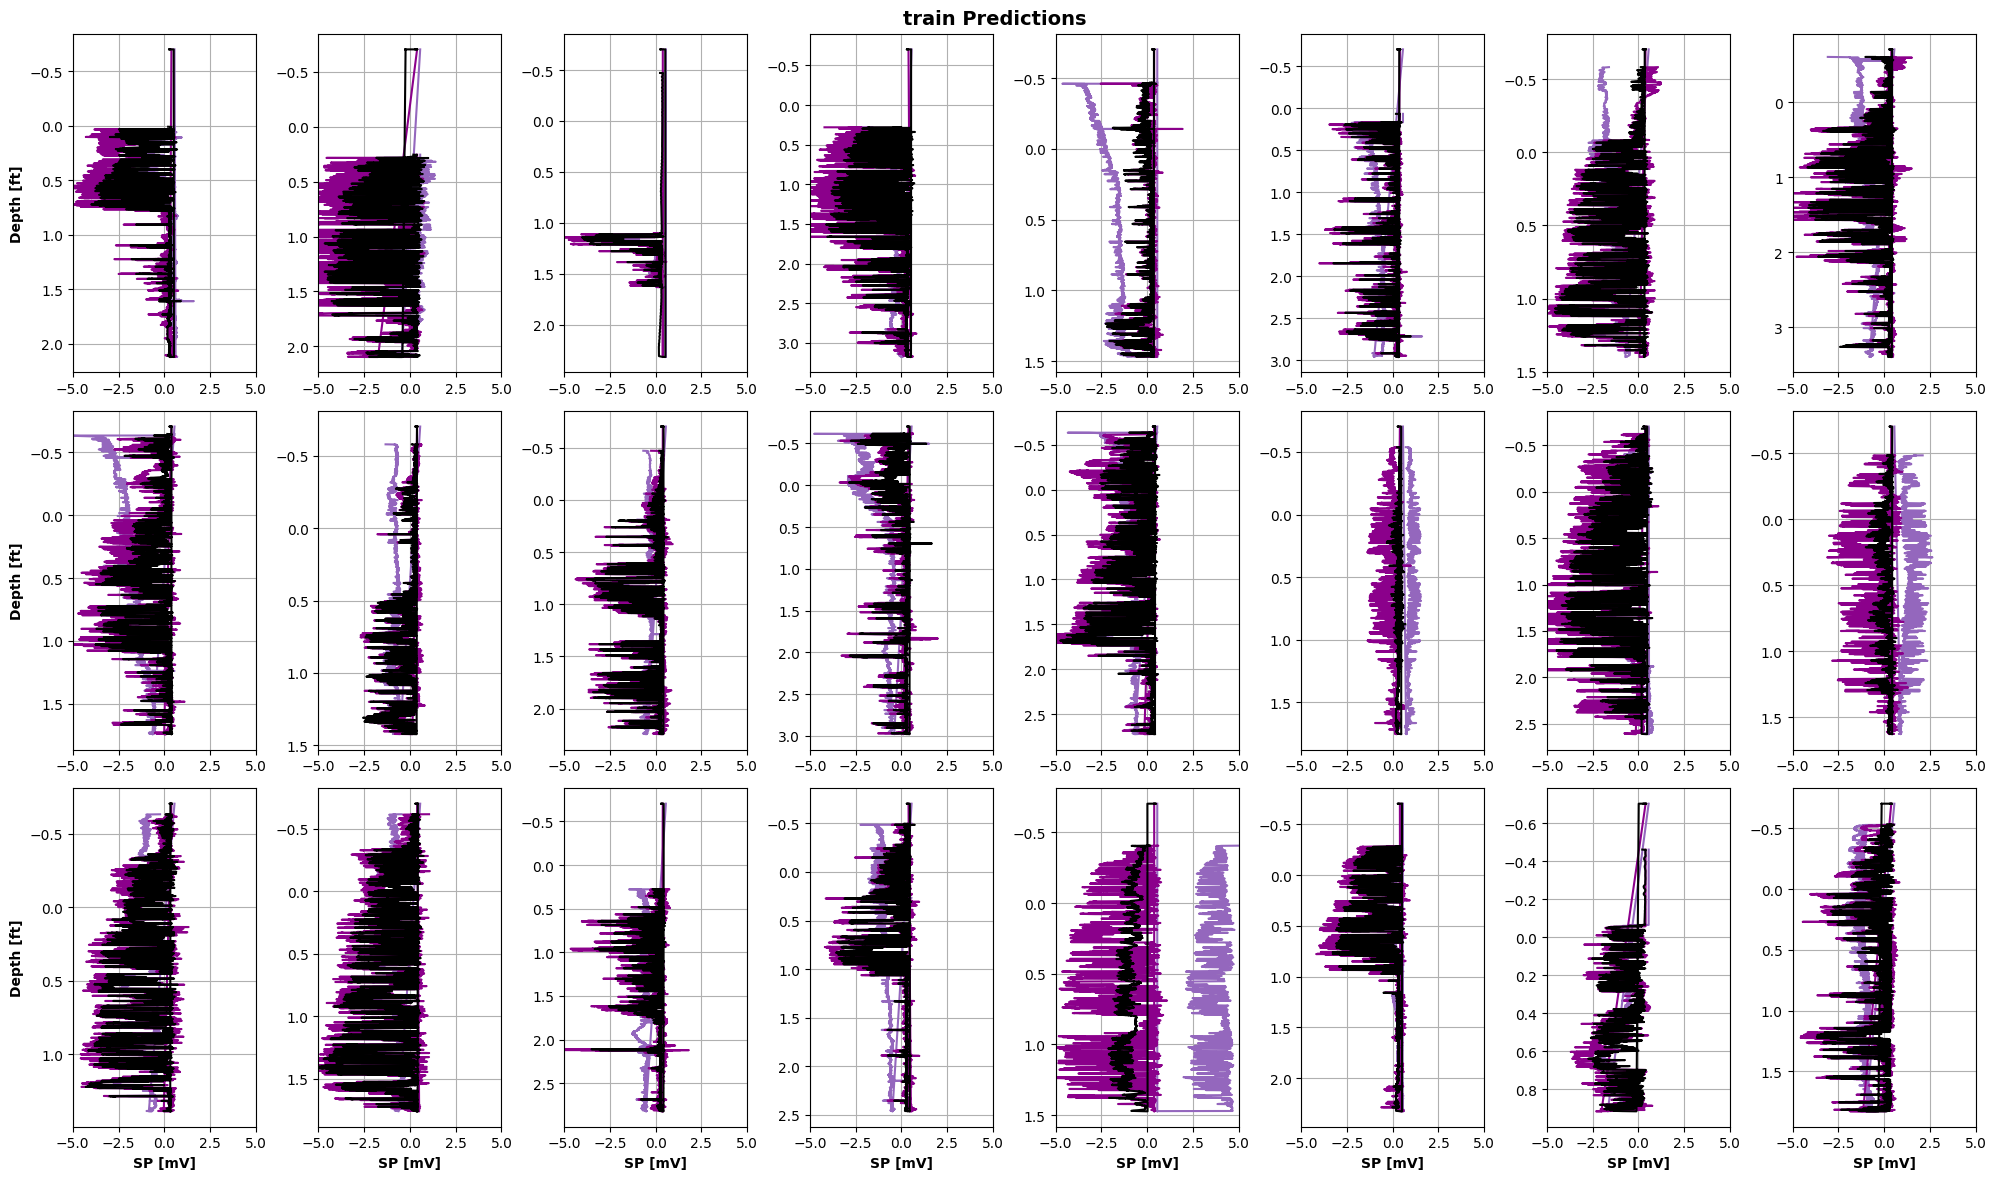

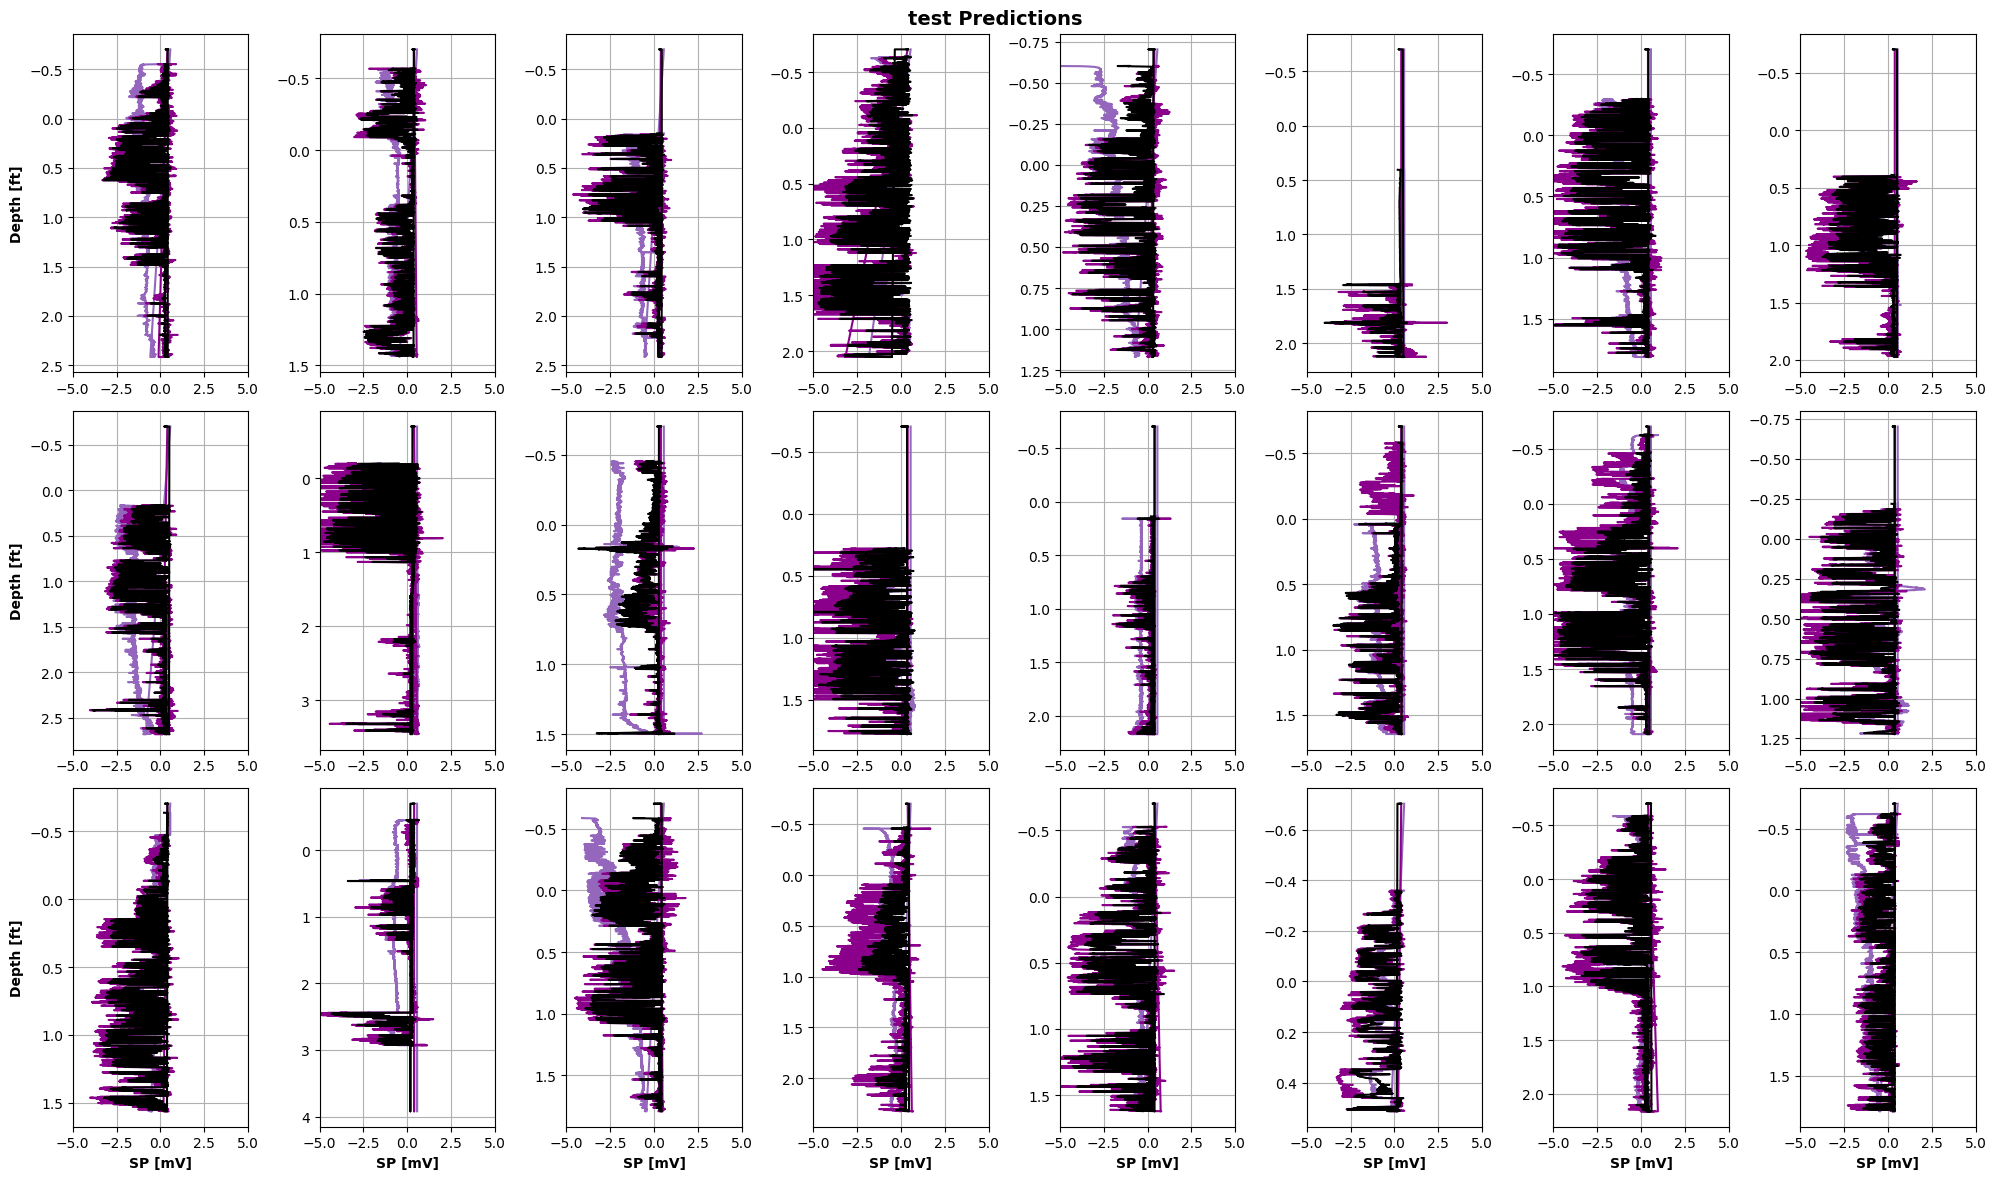

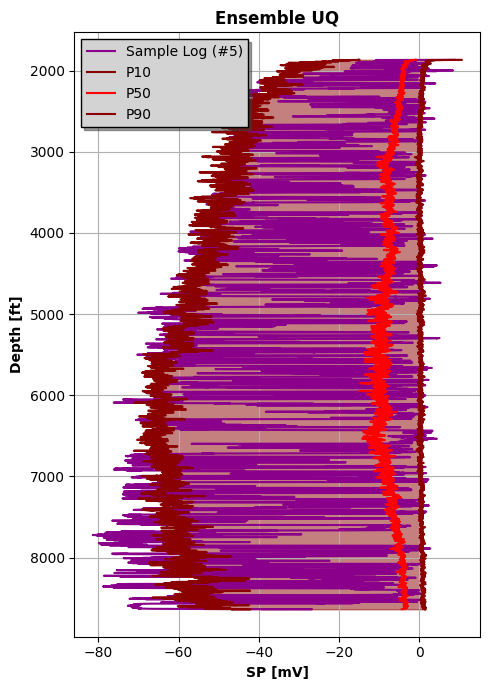

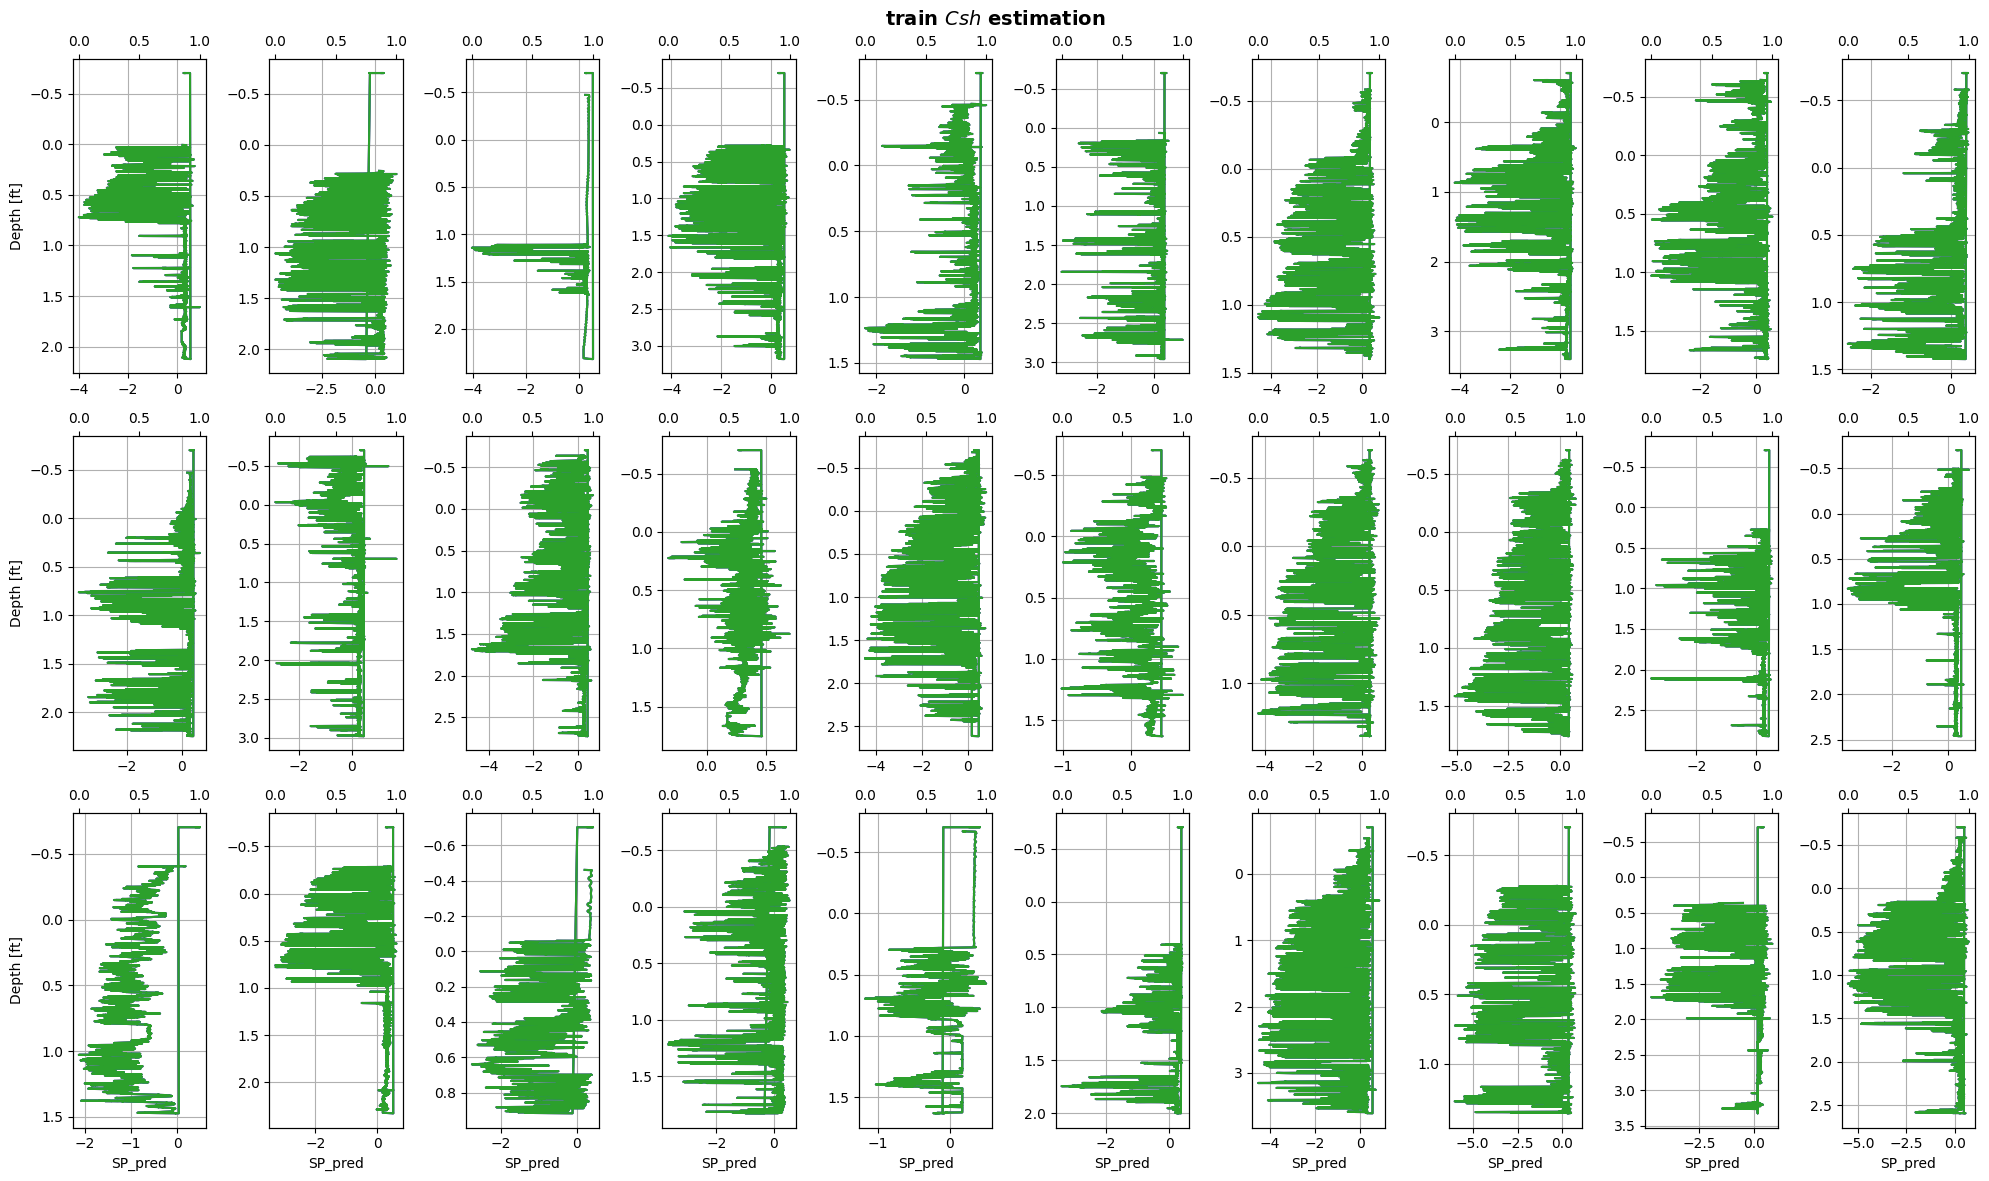

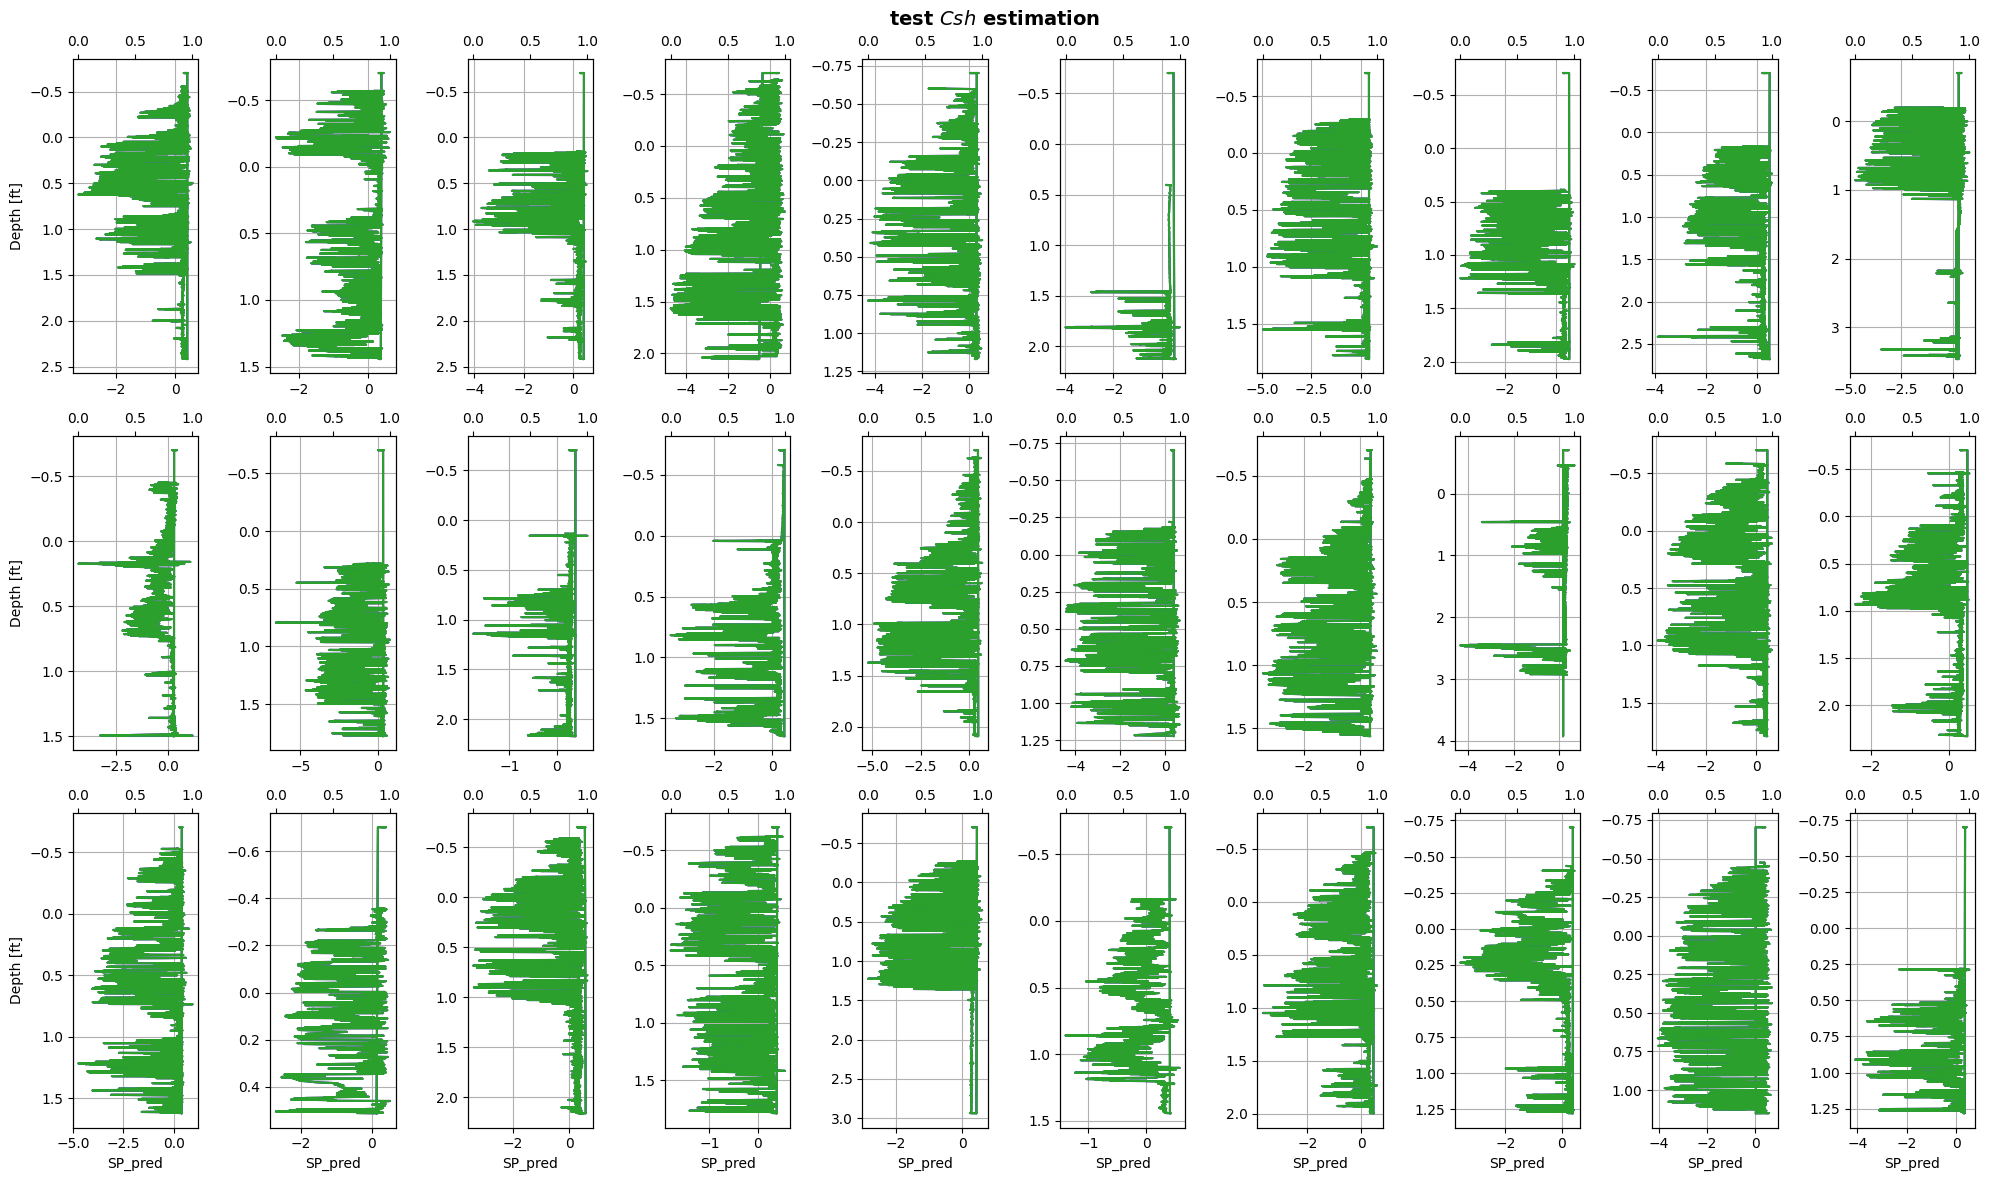

------------------------------------------------------------


In [14]:
blc.make_predictions()

***
# END